In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import models,layers,optimizers, callbacks, regularizers
import numpy as np

In [3]:
(x_train , y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(f"X train shape{x_train.shape}-- Y train shape{y_train.shape}")

X train shape(50000, 32, 32, 3)-- Y train shape(50000, 1)


In [4]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [5]:
with open('/home/aniscorp/Desktop/classe_name.txt','r') as name :
  class_names = [line.strip() for line in name]

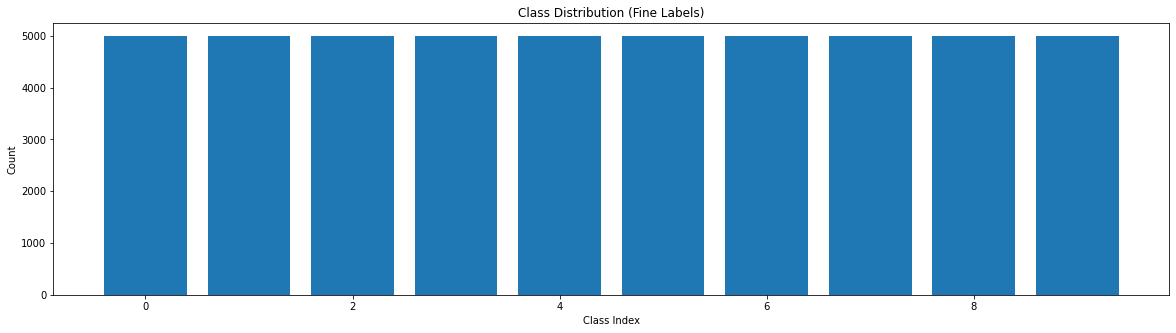

In [6]:
#show class distribution
from collections import Counter

counts = Counter(y_train.flatten())
plt.figure(figsize=(20, 5))
plt.bar(range(10), [counts[i] for i in range(10)])
plt.title("Class Distribution (Fine Labels)")
plt.xlabel("Class Index")
plt.ylabel("Count")
plt.show()


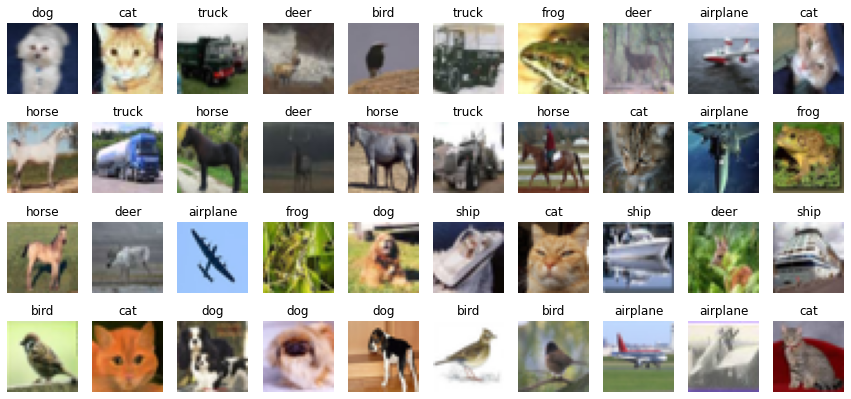

In [7]:
#Images visualization
def show_images(images, labels, class_names, num=40):
    plt.figure(figsize=(15, 7))
    for i in range(num):
        idx = np.random.randint(0, len(images))
        plt.subplot(4, 10, i+1)
        plt.imshow(images[idx])
        plt.title(class_names[labels[idx].item()])
        plt.axis('off')
    plt.show()
show_images(x_train,y_train,class_names)

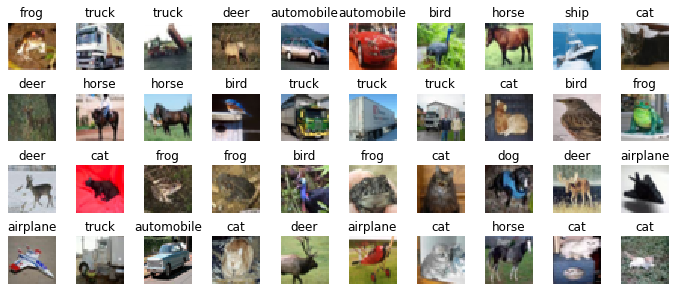

In [8]:
#Images visualization
n_rows=4
n_cols=10
plt.figure(figsize=(n_cols*1.2,n_rows*1.2))
for row in range(n_rows):
  for col in range(n_cols):
    index=n_cols*row+col
    plt.subplot(n_rows,n_cols,index+1)
    plt.imshow(x_train[index],cmap="binary",interpolation="nearest")
    plt.axis("off")
    plt.title(class_names[y_train[index].item()],fontsize=12)
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

2- Feature Engineering

  Handle missing values and outliers

  Create new features and normalize data

In [9]:
# checking missing value
print(f"Is there any missing value in x_train ? {np.isnan(x_train).any()}")
print(f"Is there any missing value in y_train ? {np.isnan(y_train).any()}")


Is there any missing value in x_train ? False
Is there any missing value in y_train ? False


In [10]:
# Flatten images from 32x32x3 to 1D arrays of size 3072
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# Flatten labels (from [[5], [7], ...] to [5, 7, ...])
y_train = y_train.flatten()
y_test = y_test.flatten()

In [11]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=10, random_state=42)

# Train the model
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test set
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test Accuracy: 30.55%

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.43      0.41      1000
           1       0.35      0.29      0.32      1000
           2       0.22      0.19      0.20      1000
           3       0.17      0.18      0.18      1000
           4       0.26      0.25      0.25      1000
           5       0.28      0.22      0.25      1000
           6       0.28      0.44      0.35      1000
           7       0.31      0.28      0.29      1000
           8       0.44      0.44      0.44      1000
           9       0.36      0.35      0.35      1000

    accuracy                           0.31     10000
   macro avg       0.31      0.31      0.30     10000
weighted avg       0.31      0.31      0.30     10000


Confusion Matrix:
[[428  54  60  72  31  28  40  59 168  60]
 [ 78 290  67  75  39  38  89  53  95 176]
 [ 95  37 189 105 168  72 181  74  40  39]
 [ 72  41  77 179  86 153 208  88  37  59]
 [ 6

In [13]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

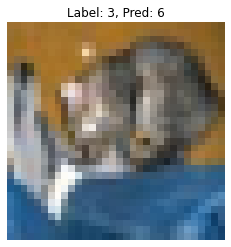

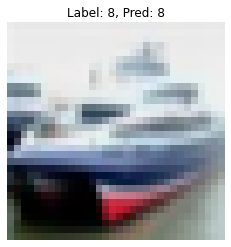

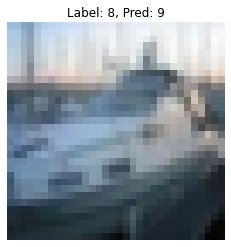

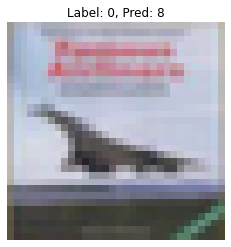

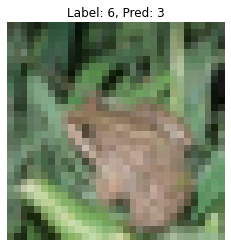

In [14]:
import matplotlib.pyplot as plt

# Function to show images
def show_image(img, label, prediction):
    plt.imshow(img.reshape(32, 32, 3))
    plt.title(f"Label: {label}, Pred: {prediction}")
    plt.axis("off")
    plt.show()

# Show first 5 test images with their predictions
for i in range(5):
    show_image(x_test[i], y_test[i], y_pred[i])

Let's train XGBoost and Neural Network for comparison

In [15]:
from xgboost import XGBClassifier

# Flatten images for XGBoost
# x_train_flat = x_train.reshape((x_train.shape[0], -1))
# x_test_flat = x_test.reshape((x_test.shape[0], -1))

# Train
xgb_clf = XGBClassifier(
    tree_method='hist',
    device='cpu',
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
xgb_clf.fit(x_train, y_train)

# Predict & Evaluate
xgb_pred = xgb_clf.predict(x_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
print(f"⚡ XGBoost Accuracy: {xgb_acc * 100:.2f}%")


/home/aniscorp/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [12:45:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


⚡ XGBoost Accuracy: 51.52%


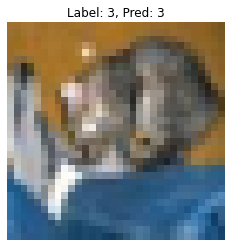

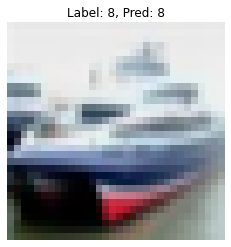

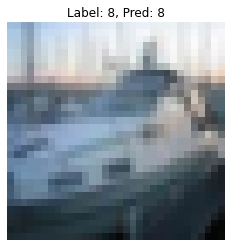

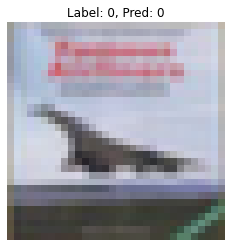

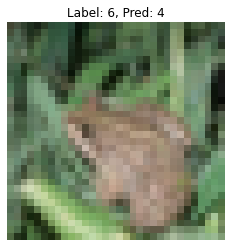

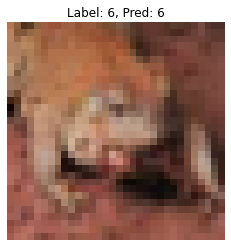

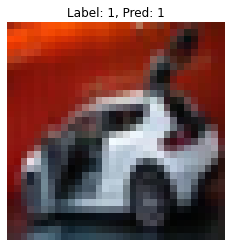

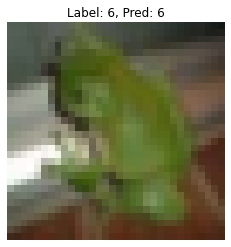

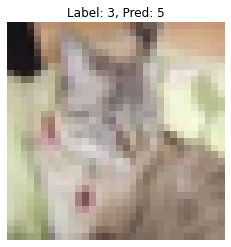

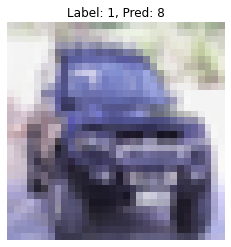

In [17]:
# Show first 5 test images with their predictions
for i in range(10):
    show_image(x_test[i], y_test[i], xgb_pred[i])

In [22]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Use unflattened data for CNN
x_train_cnn = x_train.reshape((-1, 32, 32, 3))  # Shape: (50000, 32, 32, 3)
x_test_cnn = x_test.reshape((-1, 32, 32, 3))    # Shape: (10000, 32, 32, 3)

# Build CNN
cnn_model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train
cnn_history = cnn_model.fit(x_train_cnn, y_train,
                            epochs=50,
                            batch_size=128,
                            validation_split=0.1,
                            verbose=1,
                           callbacks=[keras.callbacks.EarlyStopping(patience=5)])

# Evaluate
cnn_loss, cnn_acc = cnn_model.evaluate(x_test_cnn, y_test, verbose=0)
print(f" CNN Accuracy: {cnn_acc * 100:.2f}%")

/home/aniscorp/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


2025-06-08 13:19:36.295651: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 552960000 exceeds 10% of free system memory.


352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.3310 - loss: 1.8237 - val_accuracy: 0.5270 - val_loss: 1.3323
Epoch 2/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.5310 - loss: 1.3099 - val_accuracy: 0.5770 - val_loss: 1.2146
Epoch 3/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5922 - loss: 1.1553 - val_accuracy: 0.6150 - val_loss: 1.1043
Epoch 4/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.6386 - loss: 1.0444 - val_accuracy: 0.6548 - val_loss: 0.9913
Epoch 5/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.6648 - loss: 0.9733 - val_accuracy: 0.6580 - val_loss: 0.9959
Epoch 6/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.6820 - loss: 0.9198 - val_accuracy: 0.6764 - val_loss: 0.9313
Epoch 7/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.7002 - loss: 0.8683 - val_accuracy: 0.6844 - val_loss: 0.9214
Epoch 8/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.7120 - loss: 0.8346 - val_accurac

2025-06-08 13:23:31.215352: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


 CNN Accuracy: 68.77%


In [26]:
# Get predicted probabilities
y_probs = cnn_model.predict(x_test_cnn)

# Convert probabilities to class predictions
y_pred = np.argmax(y_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


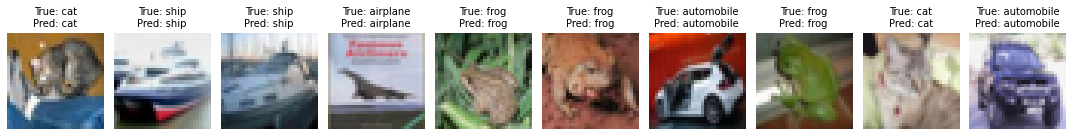

In [29]:
import matplotlib.pyplot as plt

# Plot first 5 test images
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_test_cnn[i])  # x_test is in [0,1] range
    plt.title(f"True: {class_names[y_test[i]]}\nPred: {class_names[y_pred[i]]}", fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()

<h1>Hyperparameters optymization</h1>

In [3]:
# Load CIFAR-10
(x_train_op, y_train_op), (x_test_op, y_test_op) = tf.keras.datasets.cifar10.load_data()

# Normalize
x_train_op = x_train_op.astype("float32") / 255
x_test_op = x_test_op.astype("float32") / 255

# Flatten labels
y_train_op = y_train_op.flatten()
y_test_op = y_test_op.flatten()


In [4]:
# Define model builder function
def build_model(hp):
    inputs = layers.Input(shape=(32, 32, 3))

    # Data Augmentation
    x = layers.RandomFlip("horizontal")(inputs)
    x = layers.RandomRotation(0.1)(x)
    x = layers.RandomZoom(0.1)(x)

    # Tune number of convolutional blocks
    for i in range(hp.Int("num_conv_blocks", 2, 4)):
        filters = hp.Int(f"filters_{i}", min_value=64, max_value=256, step=64)
        kernel_size = hp.Choice(f"kernel_size_{i}", values=[3])
        x = layers.Conv2D(filters, kernel_size, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation("relu")(x)
        if i % 2 == 0:
            x = layers.MaxPooling2D(2)(x)

    x = layers.GlobalAveragePooling2D()(x)

    # Tune dense layers
    for _ in range(hp.Int("dense_layers", 1, 2)):
        units = hp.Int("dense_units", 128, 512, step=128)
        dropout_rate = hp.Float("dense_dropout", 0.0, 0.5, step=0.1)
        x = layers.Dense(units, activation="relu", kernel_regularizer=regularizers.l2(1e-4))(x)
        x = layers.Dropout(dropout_rate)(x)

    outputs = layers.Dense(10, activation="softmax")(x)

    model = models.Model(inputs, outputs)

    learning_rate = hp.Choice("learning_rate", [1e-3, 5e-4, 1e-4])
    optimizer = hp.Choice("optimizer", ["adam", "sgd"])

    if optimizer == "adam":
        opt = optimizers.Adam(learning_rate=learning_rate)
    else:
        opt = optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)

    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=opt,
        metrics=["accuracy"]
    )

    return model

In [ ]:
from kerastuner.tuners import RandomSearch

# Initialize tuner
tuner = RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=30,
    executions_per_trial=1,
    directory="cifar10_tuning",
    project_name="improved_cnn"
)

# Callbacks
early_stop = callbacks.EarlyStopping(monitor="val_loss", patience=5)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Start search
tuner.search(
    x_train_op, y_train_op,
    validation_data=(x_test_op, y_test_op),
    epochs=80,
    batch_size=128,
    callbacks=[early_stop, reduce_lr]
)

# Get best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate
loss, acc = best_model.evaluate(x_test_op, y_test_op, verbose=0)
print(f"Best Model Test Accuracy: {acc:.4f}")

/tmp/ipykernel_18517/1582990046.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch
E0000 00:00:1749820125.167023   18517 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1749820125.198690   18517 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Reloading Tuner from cifar10_tuning/improved_cnn/tuner0.json

Search: Running Trial #20

Value             |Best Value So Far |Hyperparameter
3                 |3                 |num_conv_blocks
192               |128               |filters_0
3                 |3                 |kernel_size_0
192               |128               |filters_1
3                 |3                 |kernel_size_1
1                 |2                 |dense_layers
512               |256               |dense_units
0                 |0.1               |dense_dropout
0.0005            |0.0005            |learning_rate
sgd               |adam              |optimizer
128               |192               |filters_2
3                 |3                 |kernel_size_2
64                |None              |filters_3
3                 |None              |kernel_size_3

Epoch 1/80


2025-06-13 13:08:45.922528: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 911ms/step - accuracy: 0.2635 - loss: 2.0988

2025-06-13 13:14:43.911617: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


391/391 ━━━━━━━━━━━━━━━━━━━━ 373s 950ms/step - accuracy: 0.2636 - loss: 2.0985 - val_accuracy: 0.1408 - val_loss: 2.4081 - learning_rate: 5.0000e-04
Epoch 2/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 381s 974ms/step - accuracy: 0.3705 - loss: 1.7878 - val_accuracy: 0.3857 - val_loss: 1.7273 - learning_rate: 5.0000e-04
Epoch 3/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 450s 1s/step - accuracy: 0.4157 - loss: 1.6623 - val_accuracy: 0.3784 - val_loss: 1.6736 - learning_rate: 5.0000e-04
Epoch 4/80
 54/391 ━━━━━━━━━━━━━━━━━━━━ 4:30 802ms/step - accuracy: 0.4362 - loss: 1.5990

In [65]:
# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:")
for key, value in best_hp.values.items():
    print(f"{key}: {value}")

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Optionally evaluate on your validation/test set
# Assuming X_test, y_test are your test data:
# loss, accuracy = best_model.evaluate(X_test, y_test)
# print(f"Test Accuracy: {accuracy}")

# Save the best model
best_model.save("best_model.h5")
print("Best model saved as 'best_model.h5'")

/home/aniscorp/.local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best Hyperparameters:
num_conv_blocks: 3
filters_0: 128
kernel_size_0: 3
filters_1: 128
kernel_size_1: 3
dense_layers: 2
dense_units: 256
dense_dropout: 0.1
learning_rate: 0.0005
optimizer: adam
filters_2: 192
kernel_size_2: 3
Best model saved as 'best_model.h5'
